<a href="https://colab.research.google.com/github/ArijeetChak/testing/blob/master/The_Spark_Foundation_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Spark Foundation Graduate Rotational Internship Program**

**Data Science and Business Analytics Task**

**Exploratory Data Analysis on 'Indian Primier League(IPL) data set.**

**Author: Arijeet Chakraborty**

Finding out most successful Teams, Players and the factors which have a significant contribution on the result.

**Dataset** : https://bit.ly/34SRn3b

In [ ]:
# Importing all the required libraries:
import pandas as pd     # Library for Data Manipulation and Analysis.
import numpy as np      # Library for scientific computing. It is an array-processing package.
import matplotlib.pyplot as plt     # Library for Data Visualization.
import seaborn as sns   # Library for high-level interface for drawing attractive and informative statistical graphics.
import warnings         # To ignore warnings
%matplotlib inline
from google.colab import drive    # For importing the data set from Google Drive.

**Data Pre-processing for 'matches.csv' data:**

**Importing 'matches.csv' data set:**

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/matches.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**To view the dimension of the data set:**

In [ ]:
df.shape

(756, 18)

 **To know names of the columns of the data set:** 

In [ ]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

**Finding out overall information on the data:**

In [ ]:
df.info

<bound method DataFrame.info of         id  season  ...         umpire2                  umpire3
0        1    2017  ...        NJ Llong                      NaN
1        2    2017  ...          S Ravi                      NaN
2        3    2017  ...       CK Nandan                      NaN
3        4    2017  ...   C Shamshuddin                      NaN
4        5    2017  ...             NaN                      NaN
..     ...     ...  ...             ...                      ...
751  11347    2019  ...        O Nandan                   S Ravi
752  11412    2019  ...     Nitin Menon                Ian Gould
753  11413    2019  ...             NaN                      NaN
754  11414    2019  ...  Bruce Oxenford  Chettithody Shamshuddin
755  11415    2019  ...       Ian Gould              Nigel Llong

[756 rows x 18 columns]>

**Is there any missing value(s) in the data set!? If yes, How many? Let us check:**

In [ ]:
df.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

**'City' column has 7 missing values. Let us check what was the dates corresponding to those matches where the venues,i.e., names of the 'City' are not found!**

In [ ]:
df[df.city.isna()][['city', 'date']]

,city,date
461,NaN,2014-04-19
462,NaN,2014-04-19
466,NaN,2014-04-23
468,NaN,2014-04-25
469,NaN,2014-04-25
474,NaN,2014-04-28
476,NaN,2014-04-30


**Interesting! All the mathches which have null values in the 'city' column were held in 2014! If we follow IPL or just search on web, we can see that for that particular year IPL was organised in Dubai! So, we can replace those missing values in the 'city' column by 'Dubai'.**

In [ ]:
df.city = df.city.fillna('Dubai')
df.isna().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

**So, now we have no missing value in the column 'city' as expected. But we can still see that there are 4 null values corresponding to columns 'winner' and 'player_of_match'. Let us see what are the entries corresponding to those missing values in the 'result' column.**

In [ ]:
df[df.winner.isnull()][['result', 'winner', 'player_of_match']]

,result,winner,player_of_match
300,no result,NaN,NaN
545,no result,NaN,NaN
570,no result,NaN,NaN
744,no result,NaN,NaN


**It is quite reasonable that matches with 'no result' will also have no 'winner' and no 'player_of_match'! Hence we can neglect those missing values.
But! 'umpire3' column consists of 637 missing values which leads to nothing but dropping the entire column.**

In [ ]:
df = df.drop(columns = ["umpire3"], axis=1)

**Data pre-processing for 'deliveries.csv' data set:**

**Importing 'deliveries.csv' data set:**

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/deliveries.csv')
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


 **To know names of the columns of the data set:** 

In [ ]:
df1.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

**Finding out overall information on the data:**

In [ ]:
df1.info

<bound method DataFrame.info of         match_id  inning  ... dismissal_kind    fielder
0              1       1  ...            NaN        NaN
1              1       1  ...            NaN        NaN
2              1       1  ...            NaN        NaN
3              1       1  ...            NaN        NaN
4              1       1  ...            NaN        NaN
...          ...     ...  ...            ...        ...
179073     11415       2  ...            NaN        NaN
179074     11415       2  ...            NaN        NaN
179075     11415       2  ...        run out  KH Pandya
179076     11415       2  ...            NaN        NaN
179077     11415       2  ...            lbw        NaN

[179078 rows x 21 columns]>

**Is there any missing value(s) in the data set!? If yes, How many? Let us check:**

In [ ]:
df1.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

**It is clear from the above output that three columns(viz., 'player_dismissed', 'dismissal_kind' and 'fielder') consisting of missing values. But the number of missing values in all these three columns are so huge that we must drop these three columns:**

In [ ]:
df1 = df1.drop(columns = ["player_dismissed"], axis=1)

In [ ]:
df1 = df1.drop(columns = ["dismissal_kind"], axis =1)

In [ ]:
df1 = df1.drop(columns = ["fielder"], axis=1)

**And hence we are completed with the Data Pre-processing part for both the data set.**

**Now let us have a jump on the analysis with respect to the participating teams:**

**At first, let us see how many teams participated in the tournament:**

In [ ]:
teams = df['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

**We must note that 'Rising Pune Supergiants' is coming twice with a spelling error as 'Rising Pune Supergiant'. So, we need to replace it by 'Rising Pune Supergiants':** 

In [ ]:
df['winner'].replace(to_replace = 'Rising Pune Supergiant', value = 'Rising Pune Supergiants', inplace = True)
teams = df['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

**Let us create a Bar Chart of the above output:**

Text(0.5, 0, 'No. of matches won\n')

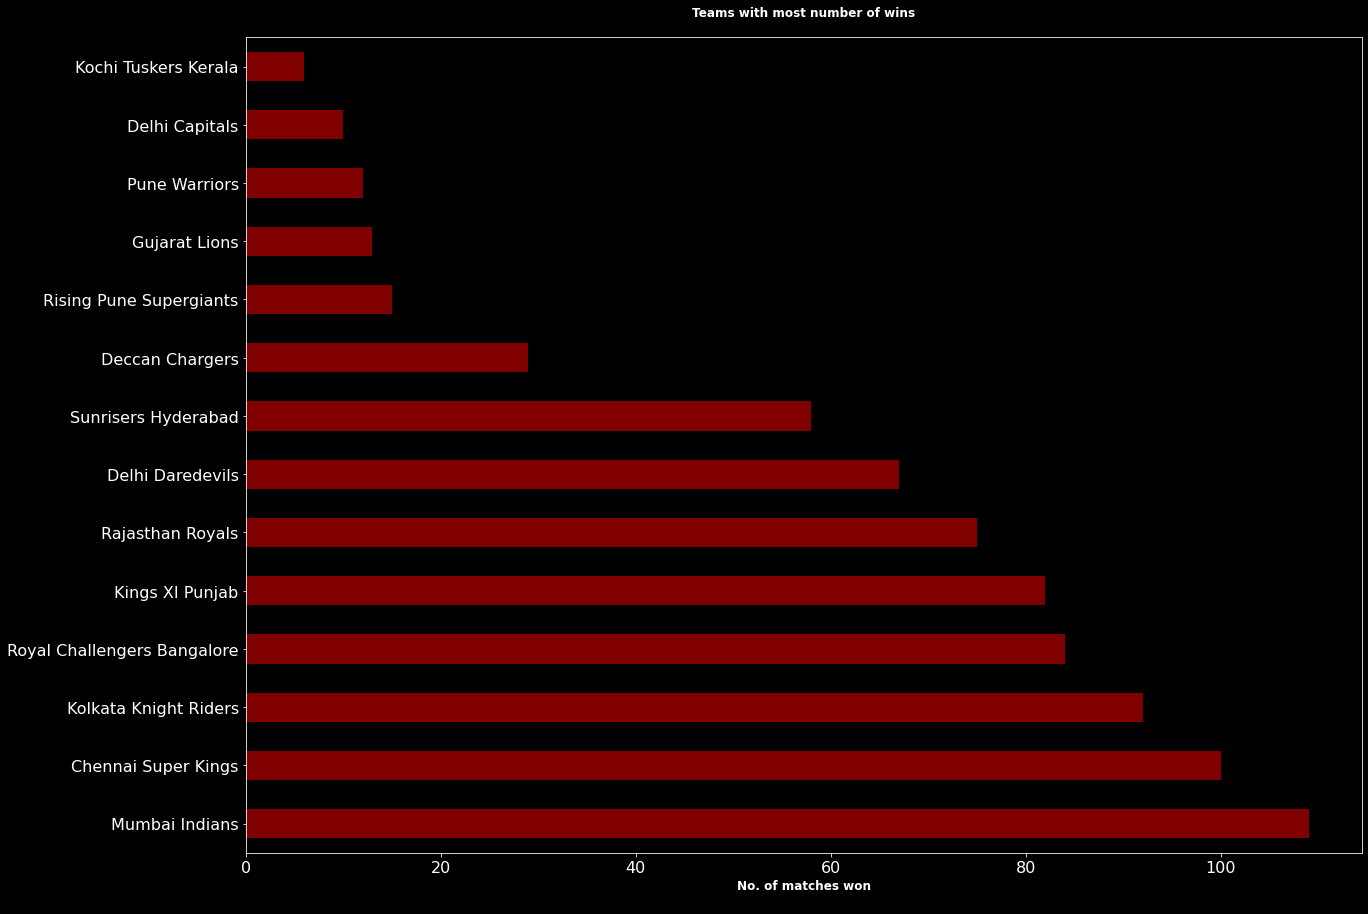

In [ ]:
teams = teams.plot.barh(figsize = (20, 15), color = 'Maroon', fontsize = 16)
plt.style.use('dark_background')
teams.set_title('Teams with most number of wins\n', fontsize = 12, fontweight= 'bold')
teams.set_xlabel('No. of matches won\n',  fontsize = 12, fontweight= 'bold')

**It is crystal clear from the above diagram that Mumbai Indians is the highest winning team and Kochi Taskers Kerala is the least winning team.**

**Now let us investigate which team has won the champion's crest maximum number of times:**

In [ ]:
winners = df[['season', 'winner']]

In [ ]:
most_winning_team = {}
for i in sorted(winners.season.unique()):
  most_winning_team[i] = winners[winners.season == i]['winner'].tail(1).values[0]

winner_of_the_season = pd.Series(most_winning_team)


winner_of_the_season = pd.DataFrame(winner_of_the_season, columns = ['Season_winner'])

In [ ]:
winner_of_the_season

,Season_winner
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad
2017,Mumbai Indians


Text(0, 0.5, 'No. of times become champion\n')

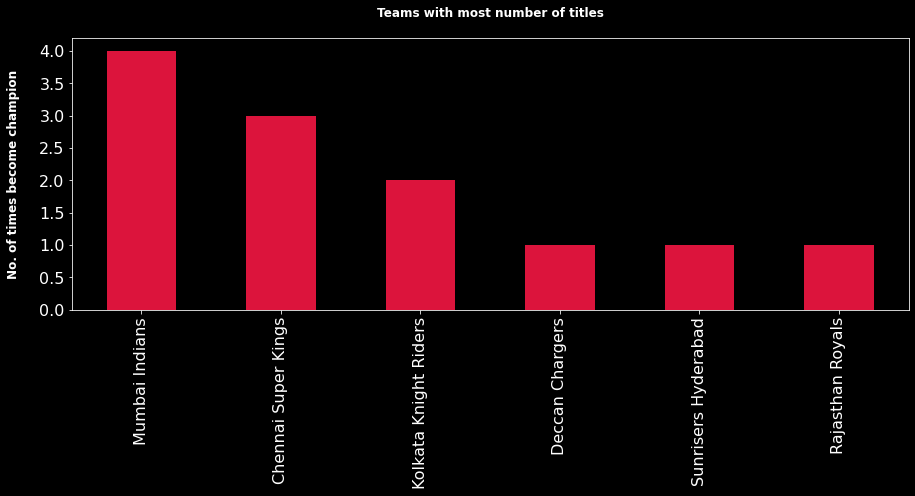

In [ ]:
winner_of_the_season = winner_of_the_season['Season_winner'].value_counts().plot(kind = 'bar', figsize = (15, 5), color = 'crimson', fontsize = 16)
plt.style.use('dark_background')
winner_of_the_season.set_title('Teams with most number of titles\n', fontsize = 12, fontweight= 'bold')
winner_of_the_season.set_ylabel('No. of times become champion\n',  fontsize = 12, fontweight= 'bold')

**From the above diagram it is seen that Mumbai Indians is the team securing maximum title.**

**Now we may be interestd in the fact whether toss has any impact or not and if yes, then how!?**

In [ ]:
toss_win = df['toss_winner'].value_counts()
toss_win

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

**Once again 'Rising Pune Supergiants' appearing twice for the same reason mentioned earlier. So, we are going to fix it:**

In [ ]:
df['toss_winner'].replace(to_replace = 'Rising Pune Supergiant', value = 'Rising Pune Supergiants', inplace = True)
toss_win = df['toss_winner'].value_counts()
toss_win

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

**Let us construct another bar chart for the toss winning feature:**

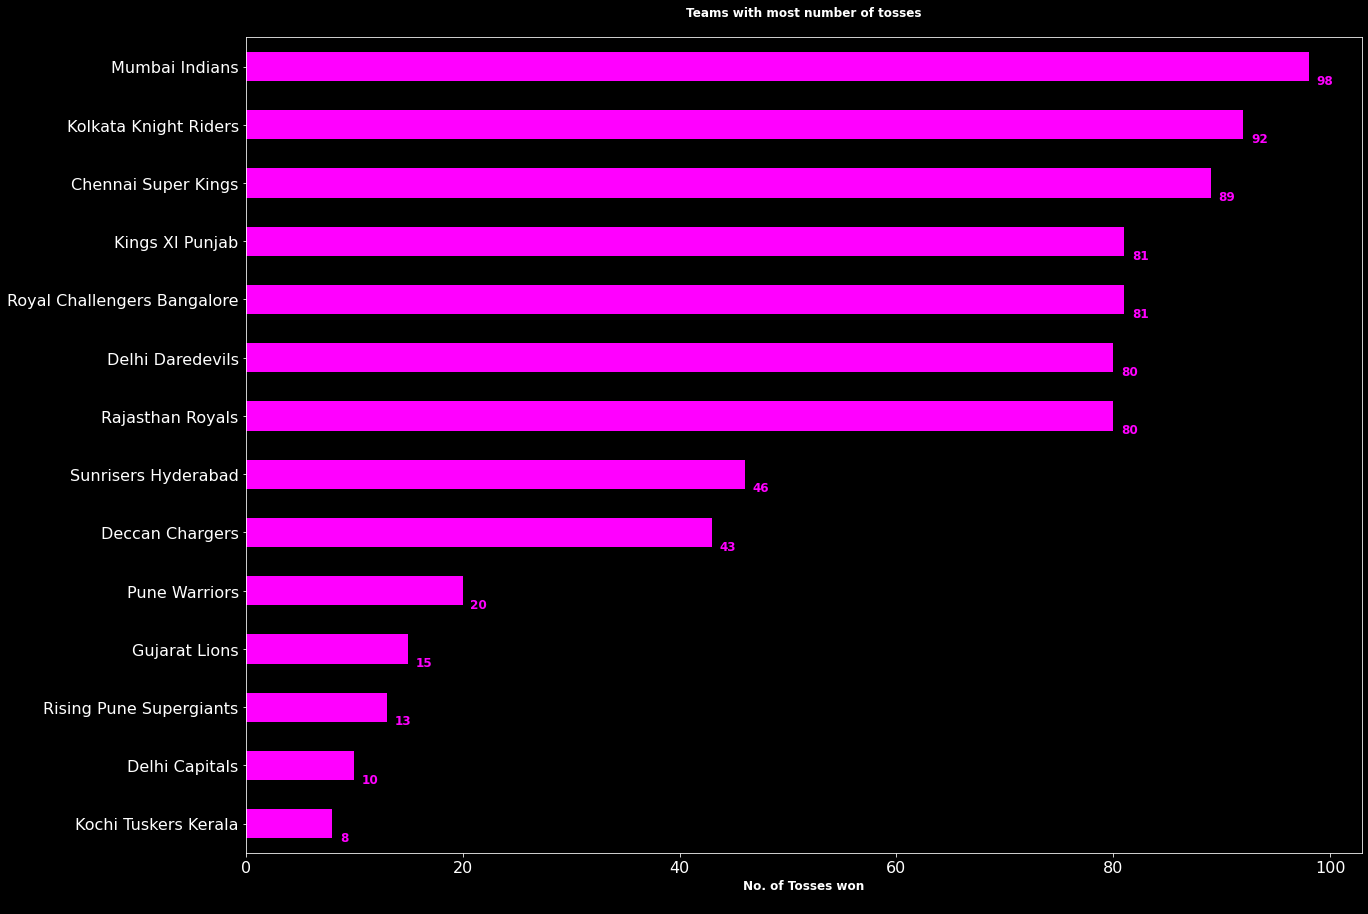

In [ ]:
toss_win = toss_win.plot.barh(figsize = (20, 15), color = 'magenta', fontsize = 16)
plt.style.use('dark_background')
toss_win.set_title('Teams with most number of tosses\n', fontsize = 12, fontweight= 'bold')
toss_win.set_xlabel('No. of Tosses won\n',  fontsize = 12, fontweight= 'bold')
toss_win.invert_yaxis()

for i in toss_win.patches:
  toss_win.text(i.get_width()+0.7, i.get_y()+0.55, i.get_width(), fontsize = 12, fontweight= 'bold', color = 'magenta')

**Clearly, top 3 teams having maximum number of champion's crest are also leaders in the list of toss winners! So, we may conclude that toss is a very crucial factor in this tournament.**

**Now, another factor, decision of the toss, might be an influencing one in the context of being a successful team. Let us see it in details:**

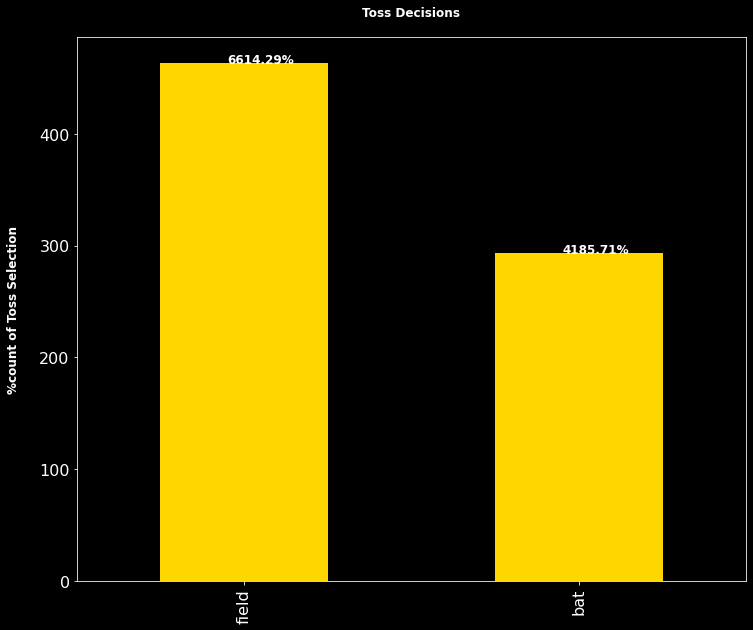

In [ ]:
toss_decision = df['toss_decision'].value_counts()
toss_decision = toss_decision.plot(kind = 'bar', figsize = (12, 10), color = 'gold', fontsize = 16)
plt.style.use('dark_background')
toss_decision.set_title('Toss Decisions\n', fontsize = 12, fontweight= 'bold')
toss_decision.set_ylabel('%count of Toss Selection\n',  fontsize = 12, fontweight= 'bold')
totals = []

# Find the values and append to list
for i in toss_win.patches:
  totals.append(i.get_height())

# Set individual bar levels using above list
totals = sum(totals)

for i in toss_decision.patches:
  toss_decision.text(i.get_x()+0.20, i.get_height()+0.05, str(round((i.get_height()/totals)*100, 2))+ '%', fontsize = 12, fontweight= 'bold', color= 'white')

**From the above diagram it is clear that choosinf field first is a favourable decision for winning any particular match.**

**Key Insights:**

1. 14 teams have played IPL from 2008 to 2019 and among them 6 teams won the champion's crest for at least once.

2. Mumbai Indians is the most successful team in this 11 years time span in which they has secured the champion's crest for 4 times. Chennai Super Kings and Kolkata Knight Riders are following in this list with the numbers 3 and 2 respectively.

3. Winning the toss and electing to bat first is a crucial factor in winning any particular match.

**Now let us have a jump on the analysis with respect to the players participating in the league:**

**In the context of judging a successful palyer in the competetion, 'player of the match' plays a very vital role. So let us discover which player became 'player of the match' maximum number of times:**

Text(0, 0.5, 'No. of awards won\n')

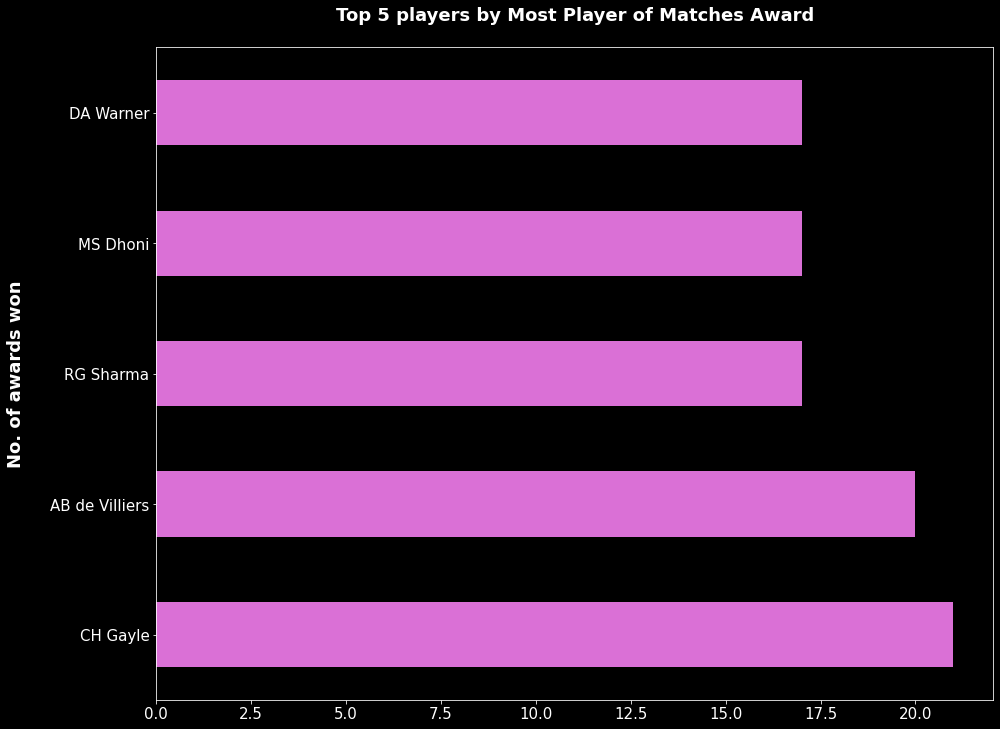

In [ ]:
mpom = df['player_of_match'].value_counts()[0:5]
mpom = mpom.plot.barh(figsize = (15, 12), color = 'orchid', fontsize = 15)
plt.style.use('dark_background')
mpom.set_title('Top 5 players by Most Player of Matches Award\n', fontsize = 18, fontweight= 'bold')
mpom.set_ylabel('No. of awards won\n',  fontsize = 18, fontweight= 'bold')

**Chirs Gayle is the player having most player of the match award.**

**Now let us investigate which batsman has faced most number of deliveries:**

Text(0, 0.5, 'No. of deliveries\n')

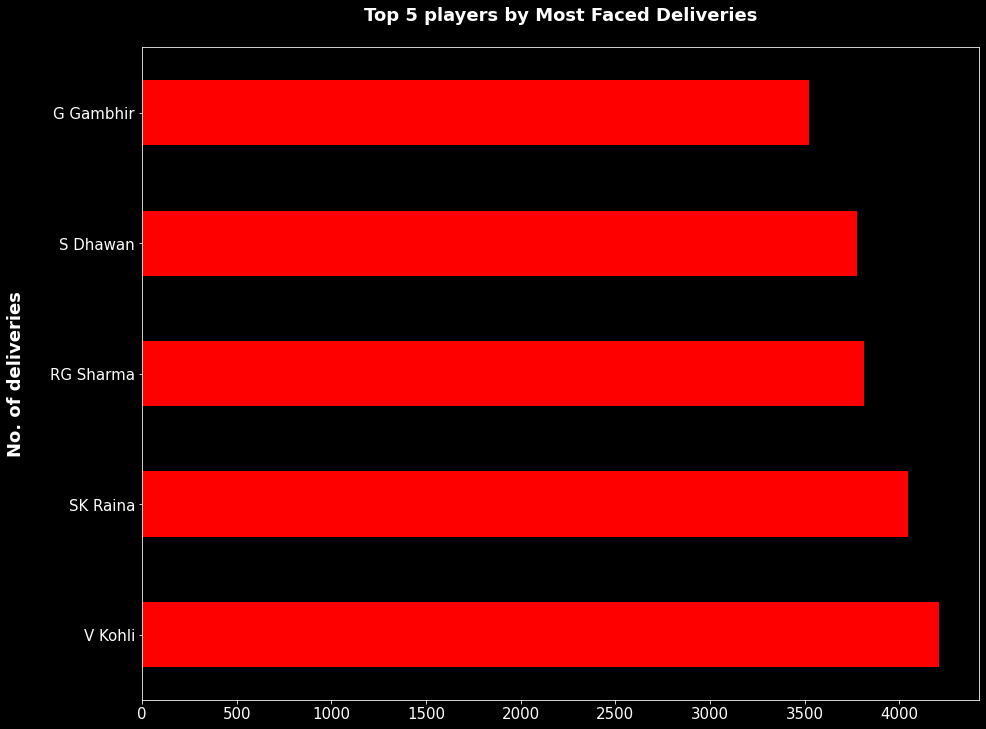

In [ ]:
pmd = df1['batsman'].value_counts()[0:5]
pmd = pmd.plot.barh(figsize = (15, 12), color = 'red', fontsize = 15)
plt.style.use('dark_background')
pmd.set_title('Top 5 players by Most Faced Deliveries\n', fontsize = 18, fontweight= 'bold')
pmd.set_ylabel('No. of deliveries\n',  fontsize = 18, fontweight= 'bold')

**Virat Kohli is the batsman who played maximum numbers of deliveries**

**Now let us see which bowler has bowled maximum number of deliveries:**

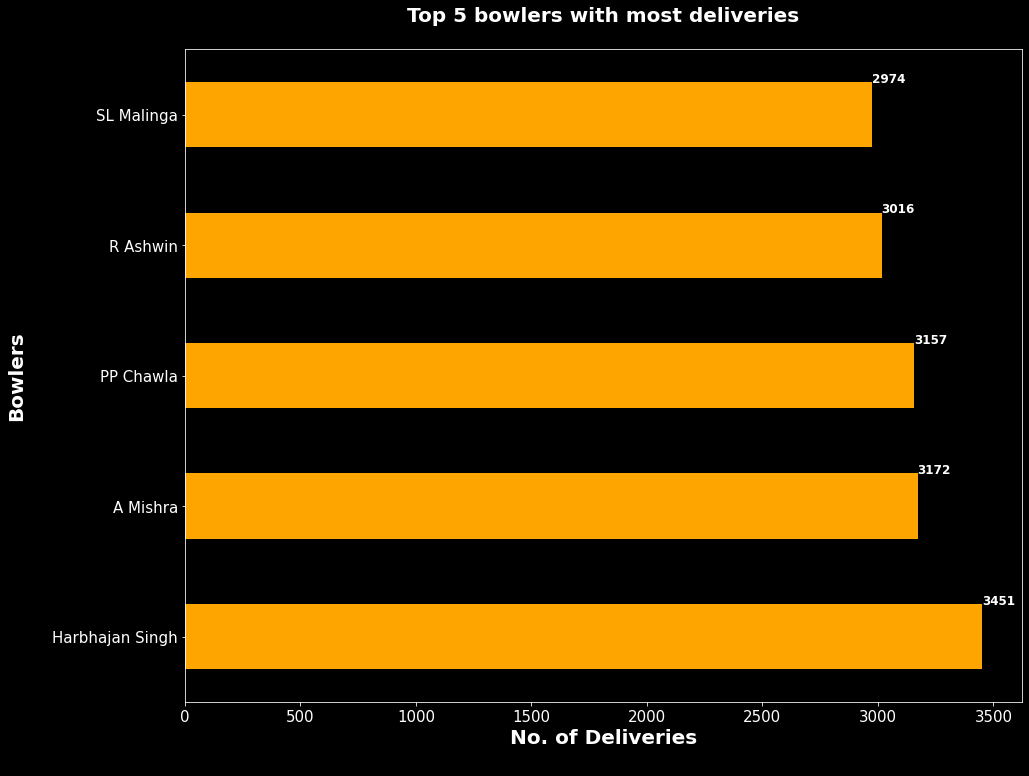

In [ ]:
bmd = df1['bowler'].value_counts()[0:5]
bmd = bmd.plot(kind = 'barh', figsize = (15, 12), color= 'orange', fontsize = 15)
bmd.set_title('Top 5 bowlers with most deliveries\n', fontsize = 20, fontweight='bold')

bmd.set_xlabel('No. of Deliveries\n', fontsize = 20, fontweight='bold')
bmd.set_ylabel('Bowlers\n', fontsize = 20, fontweight='bold')

for i in bmd.patches:
  bmd.text(i.get_width()+0.06, i.get_y()+0.5, i.get_width(), fontsize = 12, fontweight= 'bold', color= 'white')

**Harbhajan Singh is the bowler bowled maximum number of deliveries**

**Top 5 players having maximum runs:**

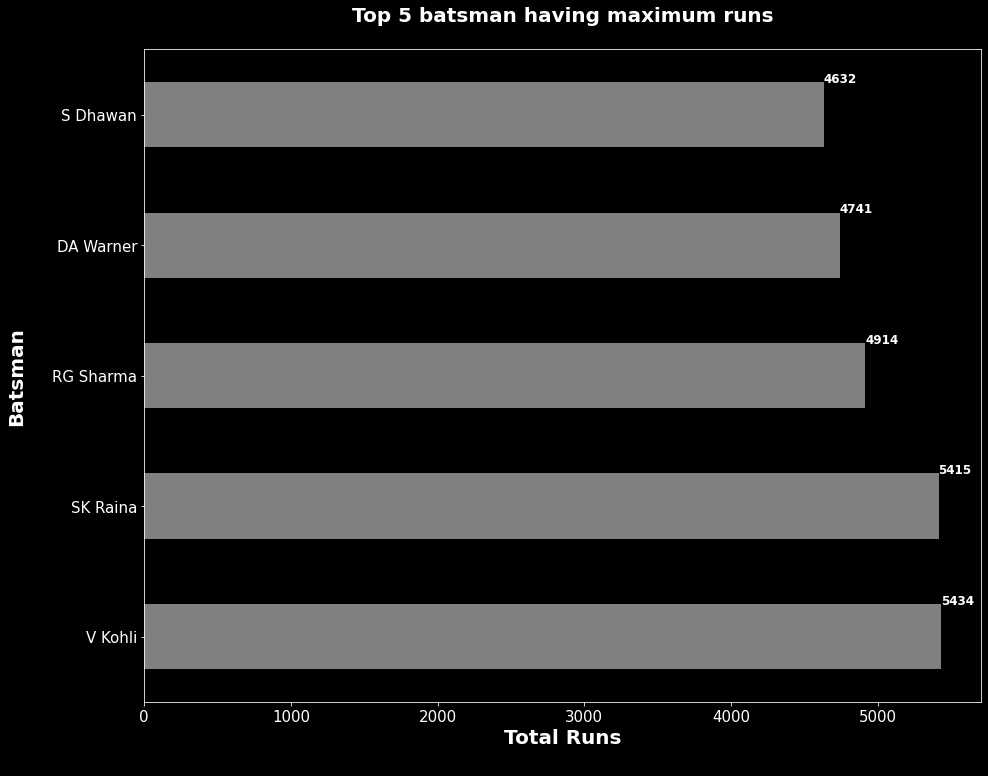

In [ ]:
trg = df1.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False)[0:5]
trg = trg.plot(kind = 'barh', figsize = (15, 12), color= 'grey', fontsize = 15)
trg.set_title('Top 5 batsman having maximum runs\n', fontsize = 20, fontweight='bold')

trg.set_xlabel('Total Runs\n', fontsize = 20, fontweight='bold')
trg.set_ylabel('Batsman\n', fontsize = 20, fontweight='bold')

for i in trg.patches:
  trg.text(i.get_width()+0.06, i.get_y()+0.5, i.get_width(), fontsize = 12, fontweight= 'bold', color= 'white')


**Virat Kohli is the batsman having highest run(5434) in IPL**

**Key Insights:**

1. Ch. Gayle bagged maximum number of player of the match award

2. V.Kohli has faced maximum number of bawls in IPL history

3. Harbhajan Singh bowled maximum number of deliveries in IPL

4. V.Kohli is the highest scoring batsman in IPL(with 5434 runs)